In [1]:
import numpy as np
import pandas as pd
# import the data first
def import_data(fName):
    with open(fName, 'r') as f:
        input_rows = []
        # read in the first line as the column names
        col_list = np.array(f.readline().strip("\n").split(","))
        # read in all other lines as data rows
        for line in f:
                line_in = (line.strip("\n")).split(",")
                input_rows.append(line_in)
    # convert to np array
    input_rows = np.array(input_rows)
    # hard code continuous variable columns
    cont_col_indices = [i for i in range(6)] + [7, 8]
    # convert continous var cols ro floats from strings
    output_ls = []
    for i in range(len(col_list)):
        if i in cont_col_indices:
            col = input_rows[:, i].astype(float).copy()     
        else:
            col = input_rows[:, i]
        output_ls.append(col)
    # return the column names and the appropiately typed dataset as list of np array columns
    return col_list, output_ls

# read in the test and train datasets with the import_data() function
cols, train = import_data("carseats_train.csv")
cols, test = import_data("carseats_test.csv")

In [2]:
cols

array(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population',
       'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='<U11')

In [3]:
train


[array([ 7.4 , 13.91,  4.1 ,  9.16,  7.22,  8.47,  5.36,  7.41,  3.47,
         5.33,  8.65,  6.18,  7.57, 10.59,  4.94,  7.72,  5.58,  9.64,
         3.89,  8.55,  5.04,  9.  ,  7.58,  8.85,  5.93, 11.85,  8.73,
         6.52,  7.02,  9.32,  6.5 ,  8.67, 11.82,  5.32,  3.07,  8.32,
         9.14,  7.6 ,  8.03, 11.19, 10.21,  8.98, 12.29,  6.88, 10.14,
         7.54, 10.44,  5.74,  6.71, 10.  ,  6.15,  8.77,  3.47, 10.48,
         7.37,  7.23, 11.19,  5.31,  9.7 ,  5.9 ,  8.89, 12.3 ,  6.64,
         7.71,  4.1 ,  6.97,  5.21,  6.62,  0.37, 10.26,  6.63,  5.87,
         6.67, 10.49,  9.01,  7.56,  5.07,  7.52, 15.63,  5.94,  7.9 ,
         7.78,  7.53,  7.3 ,  9.45,  7.95,  6.81,  5.68, 10.51,  5.4 ,
         4.53,  7.99,  8.19,  9.48,  0.53,  4.69,  7.45,  7.36, 13.39,
         5.87,  4.95,  9.09,  6.88,  4.74,  9.01,  3.62,  2.66, 10.62,
         6.41,  4.19,  9.34,  3.9 ,  9.08,  8.7 ,  5.17,  7.5 ,  8.61,
         5.3 ,  7.63,  5.28,  5.32,  2.05,  5.36,  9.39,  7.74,  4.47,
      

In [4]:
test

[array([ 3.02,  2.86,  8.77,  4.36,  8.86,  2.23, 11.27,  8.39,  9.1 ,
        11.27,  4.69,  8.68, 11.91,  5.52,  9.54, 10.43,  7.22, 16.27,
         8.09,  5.87,  7.7 ,  8.71,  6.1 ,  4.55,  9.5 ,  6.14,  9.31,
         6.68,  6.37,  4.62, 12.57, 13.28,  5.71,  0.91, 13.14,  5.08,
         6.01,  7.81, 12.53,  6.53,  3.9 ,  6.85, 10.64, 14.9 , 11.62,
         4.95,  7.56,  7.43,  5.08,  6.38, 12.44,  7.52,  5.97,  9.46,
         9.44,  3.24,  3.45,  9.03, 13.55,  7.64,  8.87, 12.66,  7.71,
         4.43,  6.2 ,  8.25, 13.44,  6.53,  5.35, 12.61,  5.86,  6.03,
        10.81,  4.56,  8.14,  6.9 ,  8.69, 10.26,  5.61,  8.75]),
 array([ 98., 121., 114., 125., 145., 111., 100., 115., 128., 153., 132.,
        131., 133., 115., 125.,  77., 114., 141., 132., 131., 118., 149.,
        153., 111., 138., 139., 122., 107., 120., 121., 138., 139., 121.,
         93., 137., 135., 131., 137., 142., 140., 124., 143., 102., 139.,
        151., 121., 110., 121., 128., 135., 127., 123., 112.,  89., 13

In [5]:
# standardizes all continous var cols in dataset arrays_to_stdize based on 
# paramameters generated from train_arrays
def get_standardization(cont_col_indices, arrays_to_stdize, train_arrays):
    for i in cont_col_indices:
        arrays_to_stdize[i] = feature_standardization(arrays_to_stdize[i], train_arrays[i])
    return arrays_to_stdize

# converts yes to 1, no to 0 for each entry in np array input
def binary_var_encoding(array):
    binary_array = []
    for i in array:
        if i == "Yes":
            binary_array.append(1)
        elif i == "No":
            binary_array.append(0)
    return np.array(binary_array)

# convert ShelveLoc col to three binary vectors corresponding to the 3 possible entries
def one_hot_encoding(array):
    ShelveLocBad, ShelveLocGood, ShelveLocMedium = [], [], []
    for i in array:
        if i == "Bad":
            ShelveLocBad.append(1)
            ShelveLocGood.append(0)
            ShelveLocMedium.append(0)
        elif i == "Good":
            ShelveLocBad.append(0)
            ShelveLocGood.append(1)
            ShelveLocMedium.append(0)
        elif i == "Medium":
            ShelveLocBad.append(0)
            ShelveLocGood.append(0)
            ShelveLocMedium.append(1)
    return [np.array(ShelveLocBad), np.array(ShelveLocGood), np.array(ShelveLocMedium)]

# stanardize continous variables to approximate a standard normal distribution
def feature_standardization(array_to_stdize, train_array):
    # parameter estimation must be done with train data only
    mean = np.sum(train_array) / len(train_array)
    std_dev = np.sqrt(np.sum(np.subtract(train_array, mean)**2) / len(train_array))
    #print(mean, std_dev)
    # now use params on array_to_stdize
    return (array_to_stdize-mean)/std_dev

In [6]:
# convert ls of cols back to 2d ndarray in row, col format
def back_to_rc(data):
    rows =  []
    for row_index in range(len(data[0])):
        row = []
        for col_index in range(len(data)):
            row.append(data[col_index][row_index])
        rows.append(np.array(row))
    return np.array(rows)

In [7]:
# process train data with the 3 functions
def process_train(train):
        # use binary_var_encoding on cols 9 and 10
        train[9] = binary_var_encoding(train[9])
        train[10] = binary_var_encoding(train[10])
        # use feature_standardization on rest
        cont_col_indices = [i for i in range(6)] + [7, 8]
        train = get_standardization(cont_col_indices, train, train)
        # use one_hot_encoding on col 6
        #print(new_train[:6])
        train = train[:6] + one_hot_encoding(train[6]) + train[7:]
        return back_to_rc(train)
    
# process test data with the 3 functions     
def process_test(test, train): 
        # use binary_var_encoding on cols 9 and 10
        test[9] = binary_var_encoding(test[9])
        test[10] = binary_var_encoding(test[10])
        # use one_hot_encoding on col 6
        
        # use feature_standardization on rest
        cont_col_indices = [i for i in range(6)] + [7, 8]
        test = get_standardization(cont_col_indices, test, train)
        test = test[:6]+ one_hot_encoding(test[6]) + test[7:]
        # reformat as 2-d ndarray: row, col
        return back_to_rc(test)

In [8]:
train

[array([ 7.4 , 13.91,  4.1 ,  9.16,  7.22,  8.47,  5.36,  7.41,  3.47,
         5.33,  8.65,  6.18,  7.57, 10.59,  4.94,  7.72,  5.58,  9.64,
         3.89,  8.55,  5.04,  9.  ,  7.58,  8.85,  5.93, 11.85,  8.73,
         6.52,  7.02,  9.32,  6.5 ,  8.67, 11.82,  5.32,  3.07,  8.32,
         9.14,  7.6 ,  8.03, 11.19, 10.21,  8.98, 12.29,  6.88, 10.14,
         7.54, 10.44,  5.74,  6.71, 10.  ,  6.15,  8.77,  3.47, 10.48,
         7.37,  7.23, 11.19,  5.31,  9.7 ,  5.9 ,  8.89, 12.3 ,  6.64,
         7.71,  4.1 ,  6.97,  5.21,  6.62,  0.37, 10.26,  6.63,  5.87,
         6.67, 10.49,  9.01,  7.56,  5.07,  7.52, 15.63,  5.94,  7.9 ,
         7.78,  7.53,  7.3 ,  9.45,  7.95,  6.81,  5.68, 10.51,  5.4 ,
         4.53,  7.99,  8.19,  9.48,  0.53,  4.69,  7.45,  7.36, 13.39,
         5.87,  4.95,  9.09,  6.88,  4.74,  9.01,  3.62,  2.66, 10.62,
         6.41,  4.19,  9.34,  3.9 ,  9.08,  8.7 ,  5.17,  7.5 ,  8.61,
         5.3 ,  7.63,  5.28,  5.32,  2.05,  5.36,  9.39,  7.74,  4.47,
      

In [9]:
processed_test = process_test(test, train) 

In [19]:
processed_test

array([[-1.6044676 , -1.72179671, -1.65937262, ..., -1.08981809,
         0.        ,  1.        ],
       [-1.66323679, -0.23494657,  0.62517533, ..., -1.47559441,
         1.        ,  1.        ],
       [ 0.50754996, -0.68746618, -1.06187546, ...,  0.83906349,
         1.        ,  1.        ],
       ...,
       [ 1.05483799,  0.67009266,  1.11723181, ...,  0.06751086,
         1.        ,  1.        ],
       [-0.65314143,  0.86402963,  1.36326006, ..., -1.08981809,
         0.        ,  1.        ],
       [ 0.50020381,  1.18725792,  0.30885331, ...,  1.2248398 ,
         1.        ,  1.        ]])

In [11]:
processed_train = process_train(train)

In [12]:
from matplotlib import pyplot as plt 

#linear regression
class LinearRegression:
    def __init__(self, data, y_vect, learning_rate, epoch_number):
        # init weights and bias at 0
        self.learning_rate = learning_rate
        self.epoch_number = epoch_number
        self.weights = np.fromiter((0 for i in range(len(data[0, :]))), dtype=int)
        self.bias = 0
        self.data = data
        self.y_vect = y_vect
        self.loss = 0
        
    def calculate_loss(self, row_index):
        # calc loss and update gradient with ONE observation at a time, not across the whole batch
        y_hat = self.get_y_hat(row_index)
        # loss = (ˆy(i) − y(i))**2
        self.loss = (np.subtract(y_hat, self.y_vect[row_index])**2)
        
    def get_y_hat(self, row_index):
        # y_hat = w^t * x^(i) + b
        return np.dot(self.weights.T, self.data[row_index]) + self.bias
    
    def update_weight(self, row_index):
        """
        w_j = w_j − 2η(ˆy(i) − y(i))x_j(i)
        """
        y_hat = self.get_y_hat(row_index)
        self.weights=self.weights-2*self.learning_rate*(y_hat- self.y_vect[row_index])*self.data[row_index]                          
        
    def update_bias(self, row_index):
        """
        b = b − 2η(ˆy(i) − y(i))
        """
        y_hat = self.get_y_hat(row_index)
        self.bias = self.bias - 2*self.learning_rate*(y_hat - self.y_vect[row_index])
    
    def get_test_loss(self):
        y_hat_vect = []
        for row_index in range(len(self.y_vect)):
            y_hat = self.get_y_hat(row_index)
            y_hat_vect.append(y_hat)
        y_hat_vect = np.array(y_hat_vect)
        # test loss = (1/row number)*(sum over all i: (ˆy(i) − y(i))**2)
        return (1/len(self.data))*np.sum(np.subtract(y_hat_vect, self.y_vect)**2)
    
    def train_model(self):
        losses = []
        # update weights and bias for each observation in each epoch
        for i in range(self.epoch_number):
            for row_index in range(len(data)):
                self.update_weight(row_index)
                self.update_bias(row_index)
                self.calculate_loss(row_index)
                losses.append(self.loss)
        steps = [i for i in range(1, len(losses)+1)]
        # plot training loss
        plt.plot(steps, losses)
        plt.title("Training Loss")
        plt.xlabel("step number")
        plt.ylabel("loss")


In [13]:
#linear regression with l-2 regularization
class Ridge(LinearRegression):
    def __init__(self, data, y_vect, learning_rate, epoch_number, lam_param):
        super().__init__(data, y_vect, learning_rate, epoch_number)
         # add lambda input parameter
        self.lam_param = lam_param
        
    def calculate_loss(self, row_index):
        super().calculate_loss(row_index)
        # linear regression loss + λ*sum_j of w_j**2
        self.loss = self.loss + self.lam_param*np.sum(self.weights**2)
        
    def update_weight(self, row_index):
        """
        wj − 2η(ˆy(i) − y(i))x_j(i) -2*lr*lambda*weight
        """
        y_hat = self.get_y_hat(row_index) 
        self.weights=self.weights \
        -2*self.learning_rate*(y_hat - self.y_vect[row_index])*self.data[row_index] \
        -2*self.learning_rate*self.lam_param*self.weights
        
    
#linear regression with l-1 regularization
class Lasso(LinearRegression):
    def __init__(self, data, y_vect, learning_rate, epoch_number, lam_param):
        super().__init__(data, y_vect, learning_rate, epoch_number)
        # add lambda input parameter
        self.lam_param = lam_param
    def calculate_loss(self, row_index):
        # linear regression loss + λ*sum_j of |w_j|
        super().calculate_loss(row_index)
        self.loss = self.loss + self.lam_param*np.sum(np.abs(self.weights)) 
    def update_weight(self, row_index):
        y_hat = self.get_y_hat(row_index)
        new_weights = []
        # control loop for using the piecewise weight gradient update 
        for weight_index in range(len(self.weights)):
            if self.weights[weight_index] > 0:
                w_j =  self.weights[weight_index] \
                -2*self.learning_rate*(y_hat - self.y_vect[row_index])*self.data[row_index][weight_index] \
                -self.lam_param*self.learning_rate
            elif self.weights[weight_index] < 0:
                w_j =  self.weights[weight_index] \
                -2*self.learning_rate*(y_hat - self.y_vect[row_index])*self.data[row_index][weight_index] \
                + self.lam_param*self.learning_rate
            else:
                #print(self.weights[weight_index] - 2*self.learning_rate*(y_hat - self.y_vect[row_index])*self.data[row_index][weight_index])
                w_j =  self.weights[weight_index] \
                -2*self.learning_rate*(y_hat - self.y_vect[row_index])*self.data[row_index][weight_index]
            new_weights.append(w_j)
        self.weights = np.array(new_weights)
    # bias update does not change 

0.14792218470521573


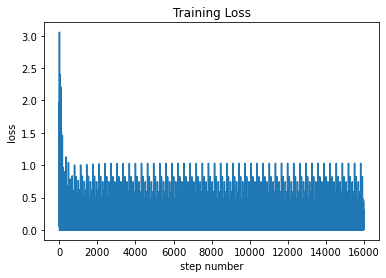

In [14]:
y_vect = processed_train[:, 0]
data = processed_train[:, 1:]
#print(data, back_to_rc(data))
LR = LinearRegression(data, y_vect, 0.01, 50)
LR.train_model()
LR.y_vect = processed_test[:, 0]
LR.data = processed_test[:, 1:]
print(LR.get_test_loss())

0.1469646987513414


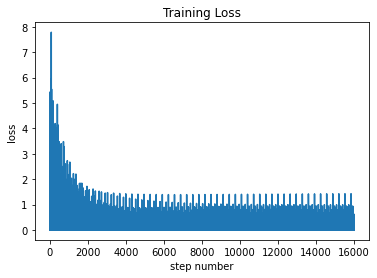

In [15]:
y_vect = processed_train[:, 0]
data = processed_train[:, 1:]
#print(data, back_to_rc(data))
LR = LinearRegression(data, y_vect, 0.001, 50)
LR.train_model()
LR.y_vect = processed_test[:, 0]
LR.data = processed_test[:, 1:]
print(LR.get_test_loss())

0.23419968265886895


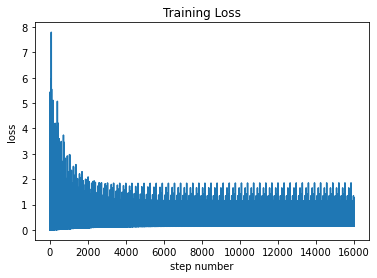

In [16]:
y_vect = processed_train[:, 0]
data = processed_train[:, 1:]
LR = Ridge(data, y_vect, 0.001, 50,  0.1)
LR.train_model()
LR.y_vect = processed_test[:, 0]
LR.data = processed_test[:, 1:]
print(LR.get_test_loss())

0.22608634542517358


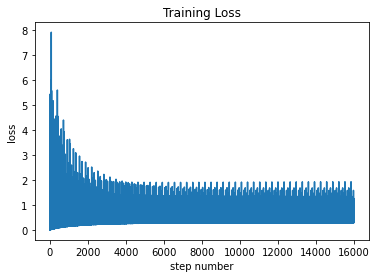

In [17]:
y_vect = processed_train[:, 0]
data = processed_train[:, 1:]
LR = Lasso(data, y_vect, 0.001, 50,  0.1)
LR.train_model()
LR.y_vect = processed_test[:, 0]
LR.data = processed_test[:, 1:]
print(LR.get_test_loss())

In [18]:
y_vect = processed_test[:, 0]
data = processed_test[:, 1:]
